In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


In [6]:
df = pd.read_excel('/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/dataAcquisition/Amazon/AmazonSaleReport.xlsx')
df.columns

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x1033c3810>>
Traceback (most recent call last):
  File "/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/.venv/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [7]:

# Load your data
df = pd.read_excel('/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/dataAcquisition/Amazon/AmazonSaleReport.xlsx', parse_dates=['Date'], index_col='Date')
df.head()


,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-30,405-8078784-5731545,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
2022-04-30,171-9198151-1101146,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2022-04-30,404-0687676-7273146,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
2022-04-30,403-9615377-8133951,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
2022-04-30,407-1069790-7240320,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


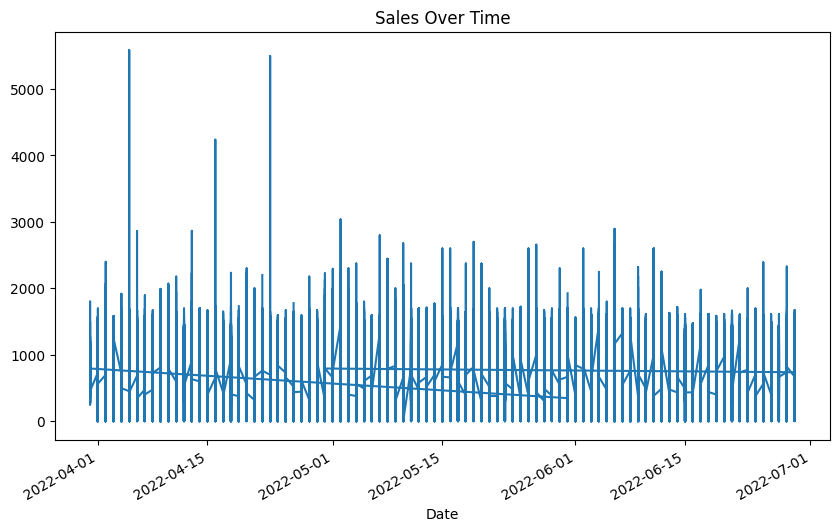

In [8]:
# Plot the time series
df['Amount'].plot(figsize=(10, 6))
plt.title('Sales Over Time')
plt.show()

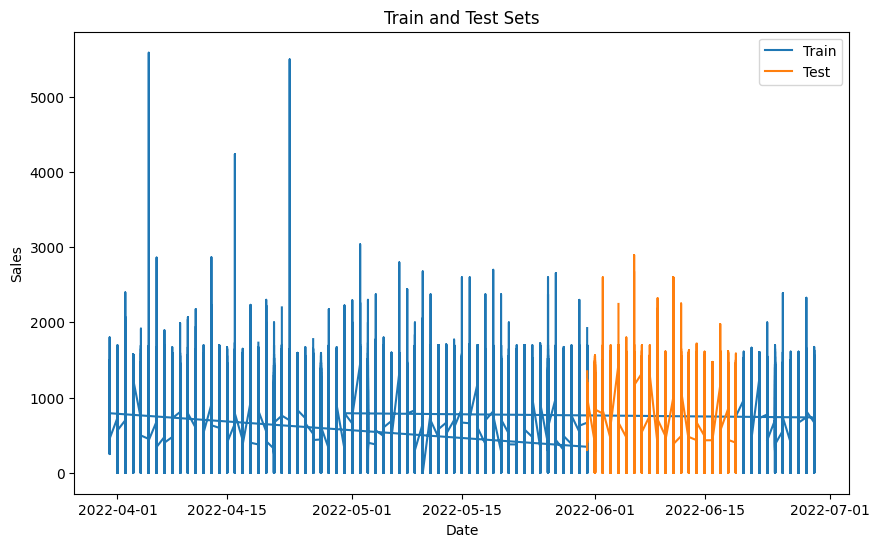

In [12]:
# Split the data into training and testing sets
# 80% for training, 20% for testing
# We do not shuffle the data because the order is important in time series
train_size = int(len(df) * 0.8)  # 80% for training, 20% for testing
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Plot the training and testing sets
plt.figure(figsize=(10, 6))
plt.plot(train['Amount'], label='Train')
plt.plot(test['Amount'], label='Test')
plt.title('Train and Test Sets')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.legend()
plt.show()

In [ ]:
# Fit the ARIMA model
model = ARIMA(df['sales'], order=(p, d, q))  # Replace p, d, q with appropriate values
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Make predictions
forecast = model_fit.forecast(steps=12)  # Forecasting 12 periods into the future
print(forecast)

# Plot the forecast
df['sales'].plot(figsize=(10, 6), label='Actual')
forecast.plot(label='Forecast', color='red')
plt.title('Sales Forecast using ARIMA')
plt.legend()
plt.show()